In [ ]:
devtools::install_github("WorldWeatherAttribution/rwwa")
suppressMessages(library(rwwa))

In [2]:
?plot_covtrend

plot_covtrend {rwwa},R Documentation
mdl,"List of attributes & parameters defining a nonstationary model, as returned by 'fit_ns'"
xcov,String indicating the covariate to plot on the x-axis. Must appear in mdl$cov.
trend_cov,"Data.frame containing values of the covariates to be used to plot the trend. Default value is NA, in which case the trend is estimated at all values of xcov with all other covariates held at their mean value"
ci_cov,"(Optional) Data.frame containing values of the covariates at which confidence intervals for the location parameter should be estimated. Default is NA, in which case no confidence bounds are plotted."
ci_col,String: set colour to be used for confidence bounds (if using). Default is 'black'.
ev,"(Optional) scalar: magnitude of the event of interest. If not provided, event value is picked up from the fitted model"
ev_x,"(Optional) scalar: x-value against which to plot the event of interest. If not provided, event year is picked up from the fitted model"
rp,"(Optional) vector of length two, setting return period for which effective return levels should be plotted. Default is c(6,40)"
add_loess,Boolean: add a Loess smoother to the plot? Default is F.
loess_col,String: set colour to be used for Loess smoother (if using). Default is 'forestgreen'.


# plot_covtrend when no event value is given

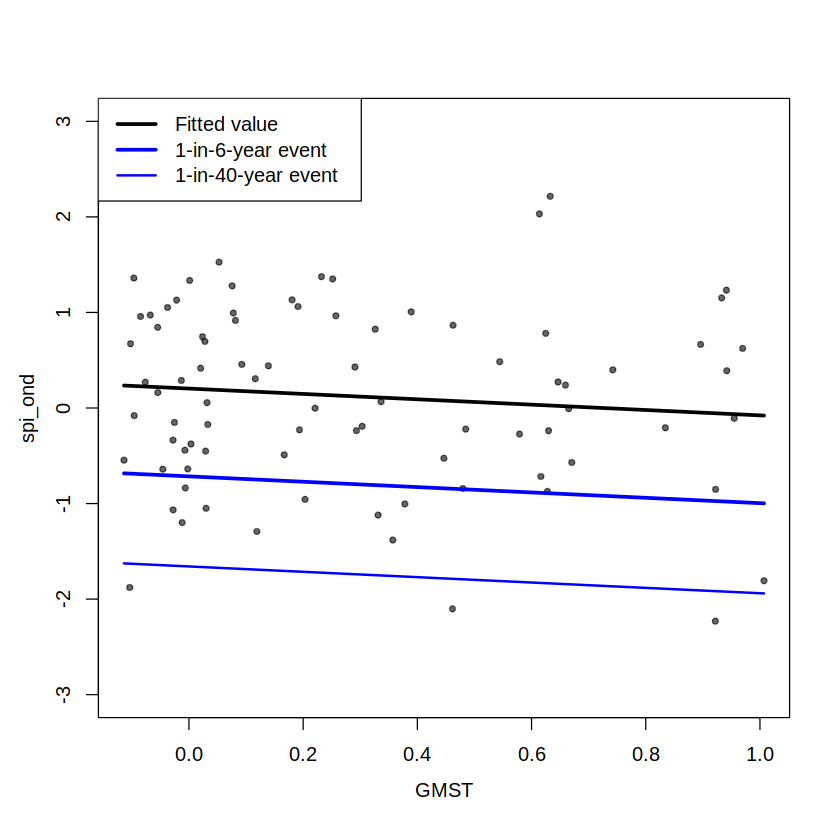

In [8]:
df <- merge(read.table("gmst.dat", col.names = c("year", "gmst")), read.table("era5_spi-ond_data.dat", header = T))
mdl <- fit_ns("norm", "shift", data = df, varnm = "spi_ond", covnm = "gmst", lower = T, ev_year = 2025, ev = 1)
plot_covtrend(mdl, "gmst")

# Linear or exponential shift+scale model


In [16]:
df <- merge(read.table("gmst.dat", col.names = c("year", "gmst")), merge(read.csv("nino34_ond.csv", col.names = c("year", "nino34")), read.table("era5_spi-ond_data.dat", header = T)))

In [26]:
gmst_shiftscale <- fit_ns("norm", "shiftscale", data = df, varnm = "spi_ond", covnm = "gmst", lower = T)
gmst_shiftscale_linear <- fit_ns("norm", "shiftscale_linear", data = df, varnm = "spi_ond", covnm = "gmst", lower = T)
gmst_shiftscale_exp <- fit_ns("norm", "shiftscale_exp", data = df, varnm = "spi_ond", covnm = "gmst", lower = T)

nino_shiftscale <- fit_ns("norm", "shiftscale", data = df, varnm = "spi_ond", covnm = "nino34", lower = T)
nino_shiftscale_linear <- fit_ns("norm", "shiftscale_linear", data = df, varnm = "spi_ond", covnm = "nino34", lower = T)
nino_shiftscale_exp <- fit_ns("norm", "shiftscale_exp", data = df, varnm = "spi_ond", covnm = "nino34", lower = T)

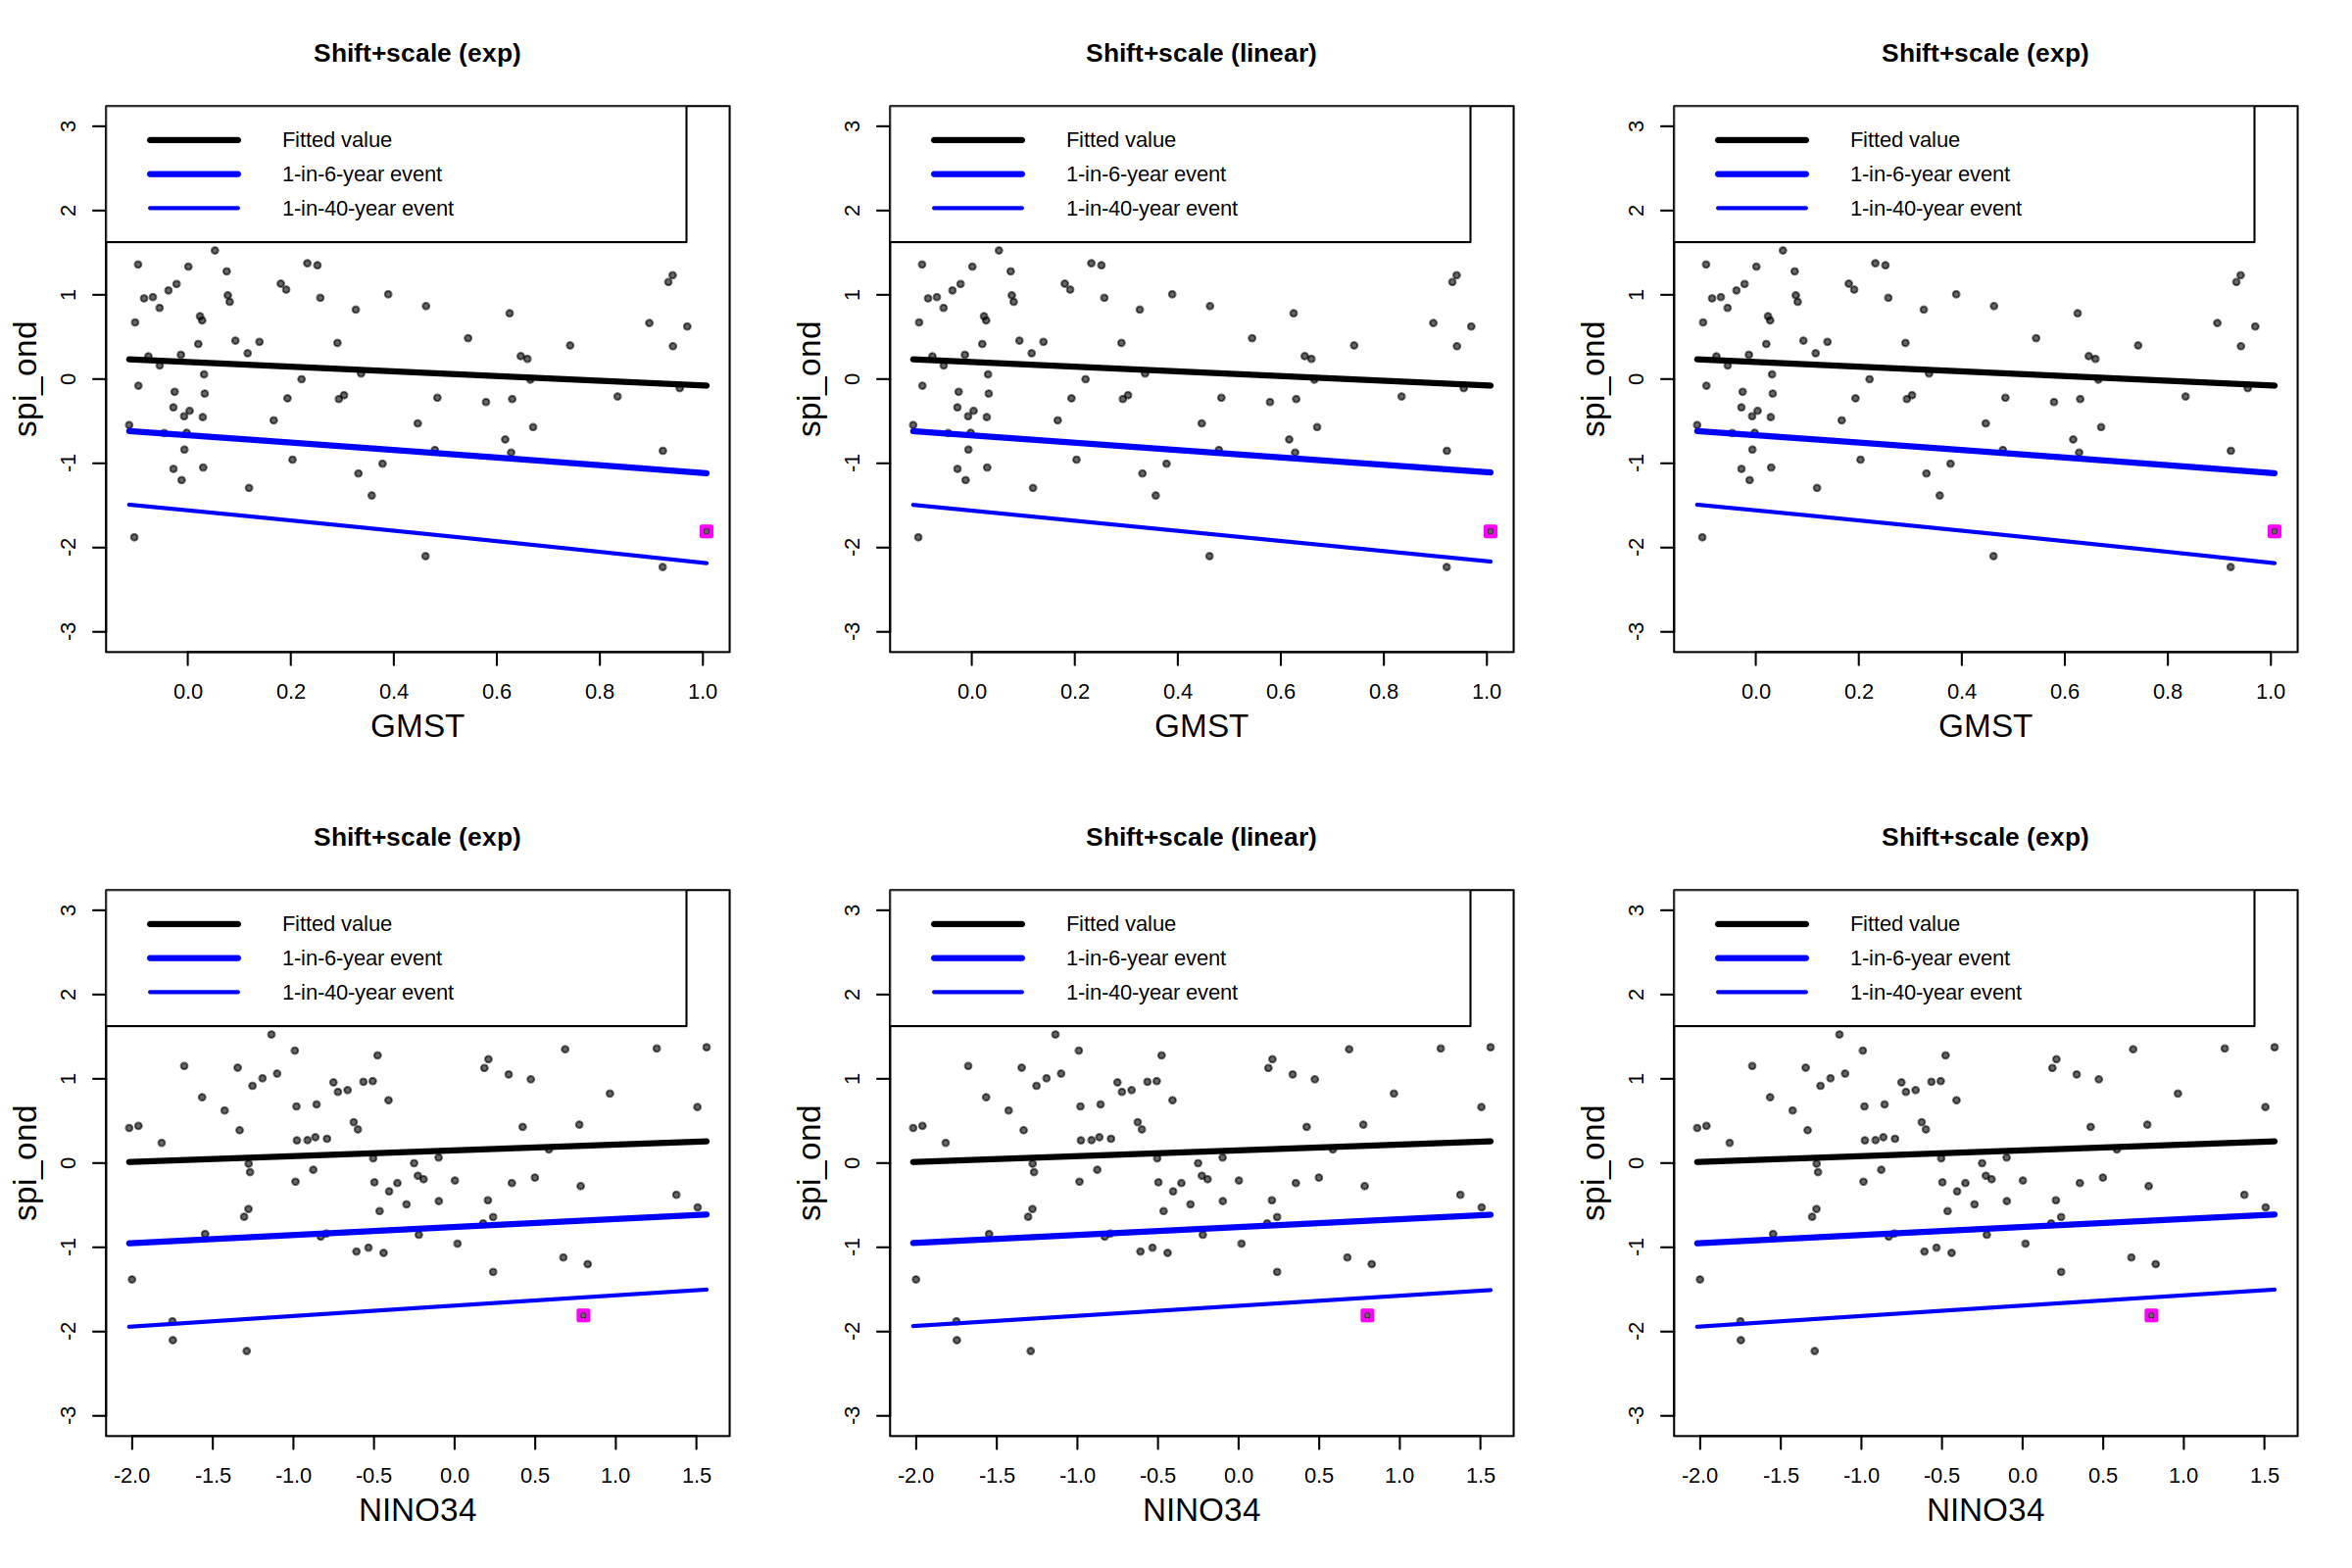

In [30]:
prep_window(c(2,3))

plot_covtrend(gmst_shiftscale, "gmst", main = "Shift+scale (exp)")
plot_covtrend(gmst_shiftscale_linear, "gmst", main = "Shift+scale (linear)")
plot_covtrend(gmst_shiftscale_exp, "gmst", main = "Shift+scale (exp)")

plot_covtrend(nino_shiftscale, "nino34", main = "Shift+scale (exp)")
plot_covtrend(nino_shiftscale_linear, "nino34", main = "Shift+scale (linear)")
plot_covtrend(nino_shiftscale_exp, "nino34", main = "Shift+scale (exp)")